# MIDC Electricity Data Sandbox

Plot MIDC Price vs SUMAS Price by Month

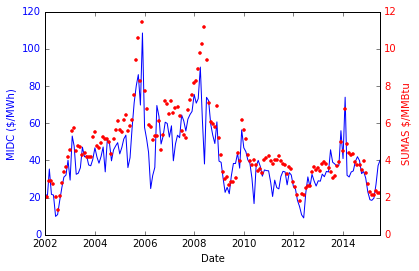

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt 

# read in csv file
df = pd.read_csv('mid_c.csv')

#create arrays of values
Date = pd.to_datetime(pd.Series(df.Date.values)) #need to convert dates from string to datetime
Peak = df.Peak.values
Sumas = df.Sumas.values

#create figure
fig, ax1 = plt.subplots()
ax1.plot(Date, Peak, 'b-')
ax1.set_xlabel('Date')
# Make the y1-axis label and tick labels match the line color.
ax1.set_ylabel('MIDC ($/MWh)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

#add a second axis      
ax2 = ax1.twinx()
ax2.plot(Date, Sumas, 'r.')
# Make the y2-axis label and tick labels match the line color.
ax2.set_ylabel('SUMAS $/MMBtu', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

#create plot    
plt.show()
